# Manufacturing defects (30 points)

In [11]:
#import packages here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.display import Markdown
import cv2

#### In previous notebooks you have already explored the importance of manufacturing parameters and curing cycles, specifically the Cure kinetics and Rheokinetics of composite production. The manufacturing process plays a crucial role when we try to guarantee a predictable part quality.

#### In this notebook you will be working on cases for which manufacturing did not reach the expected and predicted quality or, in other words, manufacturing related defects have been detected.

#### Understanding defects is an important part of composite manufacturing. Defects can (and will) occur during most manufacturing processes. You will learn to recognise defects, assess data for components with and without defects, how to deal with shrinkage of polymeric matrices, how to use image analysis to assess defects in fabric weaves, and reflect on the consequences of defects.

#### Defects in composites can be generally classified as one of the types shown in the graph (Figure 1) below.

<img src="defect_types.png" width="500" height="340">

Figure 1

## Question 1 (3 points)

#### A case study will be used in this question to start approaching the problem of defects. In this case you will be considering the X-33 liquid hydrogen (LH2) tank. During a protoflight structural test in November 1999, this tank failed catastrophically as can be seen below.

<img src="x33gobrrr.png" width="800" height="500">

Figure 2

##### From: NASA Langley Research Center, Hampton, Virginia, 23681, U.S.A.

#### As a first step, please read carefully the article provided with this notebook:
#### Ransom, Jonathan & Glaessgen, Edward & Raju, Ivatury & Knight, Norman & Reeder, James. (2008). Lessons Learned from Recent Failure and Incident Investigations of Composite Structures. 10.2514/6.2008-2317.

#### Question 1.1: For the case mentioned above, explain what the initial type of defect was, and why this is disadvantageous for composite parts in general. Refer to Figure 1 when writing in your answer.


The initial type of defect identified for the X33 tank is classified as an external defect caused by the presence of a foreign object. Teflon tape that is required to be discarded was instead found between the interface between the facesheet and core. The presence of such a foreign object did not allow for the correct bonding between the two interfaces of the composite, initiating a debond. This is disadvantageous for composites in general since it weakens the structure by lowering the interlaminar shear strength. By initiating a debond, load is not transferred through the entire composite, decreasing its load bearing capabilities. Cracks then propagate due to the now overloaded structure.

#### Question 1.2: What could be the root causes of the initial defects? Suggest a modification to the manufacturing process to ensure that a new part produced through this method is less likely to exhibit the previously identified defects.

The root cause of such an initial defect is negligence of the operator. The manufacturing process plan was not followed by recommended procedures, which resulted in a foreign object that was required to be discarded, left in the composite. Thorough quality control after the process would have caught such an error but was also missed. This is probably due to poor or no inspection after the composite part was made. Inspections and quality control steps to the process plan documentation of making such composites would avoid such mistakes in the future.

## Question 2 (2 points)
## Free shrinkage and residual stresses

### Additional defects that can occur in composites include micro-cracks, typically emerging from the combination of residual stresses with thermal cycling or mechanical loading. The primary cause of residual stresses at a micro-mechanical level is the disparity in shrinkage between the fibers and the matrix. Specifically, the polymer matrix tends to undergo considerably more shrinkage (dictated by the coefficient of thermal expansion, CTE) during consolidation and cooling compared to the contracting fibers.

<img src="shrinkage UD.png" width="600" height="400">

Figure 3

#### In this question we will work towards identifying the differences in shrinkage characteristics of two different thermoplastics (an amorphous and a semi-crystalline polymer). Draw typical storage modulus vs. temperature graphs for both categories. Display them in two different graphs. Explain the evolution of mechanical properties, including: how the Storage modulus evolves as a function of temperature, identification of relevant temperature points along the curve and what they represent.

<img src="Amorphous.jpg" width="500" height="500">
<center>Figure: Amorphous Thermoplastic (Polyetherimide)
<img src="Semi-Cryst.jpg" width="500" height="500">
Figure: Semi-Crystalline Thermoplastic (Polyetheretherketone)</center>

For an amorphous thermoplastic, the storage modulus vs temperature graph has one distinct observation. As the temperature increases, storage modulus slightly decreases. But once the temperature is closer to the glass transition temperature ($T_g\approx 217°C$), the storage modulus decreases drastically. This signifies a change in phase as the polymer becomes more rubbery in nature and dissipates energy more easily. 

For a semi-crystalline thermoplastic, the same graph now has two distinct features that occur at two temperature points. Firstly, a slight dip in storage modulus occurs as temperatures rise to the polymer's glass transition temperature ($T_g \approx 147°C$). The reason behind this dip is similar to that of an amorphours thermoplastic, but due to its crystallinity, the storage modulus does not decrease as much. At the second temperature point, however, the storage modulus now plumets. This point is the melting temperature ($T_m \approx 343°C$) of the polymer where there elastic properties of the polymer become lowest.

Reference:

[1] Polymer Composite Manufacturing - Lecture Slide 3.

## Question 3 (6 points)
#### When dealing with TP consolidation cycles, understanding shrinkage and the potential occurrence of residual stresses in a part is crucial when dealing with the design of consolidation cycles for thermoplastic composites.

#### For the production and autoclave consolidation of a 1 m wide and 2 m long panel using a single unidirectional lamina, two carbon fibre thermoplastic prepregs are under consideration: one with a Polycarbonate matrix and the other with a Polyamide matrix, both utilizing T1000 UD as the reinforcement. It concerns a zero-bleed prepreg with a fibre volume fraction of 55%. The consolidation cycle involves a 200°C dwell, maintained for 1 hour, followed by a cooling phase at 2°C/min until reaching room temperature (20°C). The consolidation cycle is shown in Figure 4 (the heating phase is not shown, as it is not relevant for this question). Equations and assumption that will help you answer the questions, are given below.

#### The longitudinal coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows: 
$$\alpha_{l} = \frac{(1-\nu_{f})E_{r}\alpha_{r}+ \nu_{f}E_{lf} \alpha_{lf}}{(1-\nu_{f})E_{r} +\nu_{f}E_{lf}}$$
#### The transverse coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows:
$$\alpha_{t} = (1-\nu_{f})\alpha_{r}+ \nu_{f}\alpha_{tf} +(1-\nu_{f})\alpha_{r}\nu_{r} +\nu_{12f}\alpha_{lf}\nu_{f} -\nu_{12}\alpha_{l}$$

#### Where $\nu_{f}$ represents fibre volume content, $E_{r}$ [GPa] Young's modulus of the matrix, $\nu_{r}$ the Poisson ratio of the matrix, $\alpha_{r}$ [1/°C] coefficient of linear thermal expansion of the matrix, $\alpha_{lf}$ [1/°C] and $\alpha_{tf}$ [1/°C] thermal expansion coefficients (CLTE) of fibres in the longitudinal and transverse direction, $E_{lf}$ [GPa] the longitudinal Young's modulus of the fibres, $\nu_{12}$ the in-plane Poisson ratio of the lamina and $\nu_{12f}$ Poisson’s ratio of the fibres.

#### The thermal strain (in longitudinal and transverse direction) can be calculated as follows: 
#### $$\epsilon = \int_{0}^{t} \alpha(t)\Delta Tdt$$

| Matrix        | Young's modulus [GPa] | Poisson ratio | CLTE [1/°C]              |
|---------------|-----------------------|---------------|--------------------------|
| Polycarbonate | 1.4                   | 0.37          | $70.2 \cdot 10^{-6}$     |
| Polyamide 6   | 3                     | 0.39          | $85   \cdot 10^{-6}$     |

<img src="Cure cycle.jpg" width="1000" height="600">

Figure 4

#### The following assumptions are made:
#### - The lamina undergoes free shrinkage
#### - The properties of the resin and fibers, including volume fraction (vf), Poisson's ratio, and coefficient of linear thermal expansion (CLTE), are non-temperature dependent. The E-modulus for the fibers is also considered non-temperature dependent. However, the E-modulus of the thermoplastic resin changes throughout the consolidation cycle. Identify, provide and use the relevant properties for analysis.
#### - Poisson ratio of the lamina can be derived using the rule of mixtures


#### Question 3.1: Given the provided equations, material properties, consolidation cycle, and the listed assumptions, please calculate:
#### - the composite material's linear coefficient of thermal expansion (in longitudinal and transverse direction).
#### - the expected strain after reaching room temperature in both length and width direction of the panel
#### - the percentage of shrinkage in length and width direction of the panel

Data for the T1000G Carbon Fibre has been taken from:

Kulkarni R, Ochoa O. Transverse and Longitudinal CTE Measurements of Carbon Fibers and their Impact on Interfacial Residual Stresses in Composites. Journal of Composite Materials. 2006;40(8):733-754. doi:10.1177/0021998305055545

In [12]:
#Necessary Data

Elf, Empc, Empa = 290000, 1400, 3000 
v12f, vmpc, vmpa = 0.23, 0.37, 0.39
alf, atf, ampc, ampa = -1.4e-06, 3.8e-06, 70.2e-06, 85e-06
vf, vm = 0.55, 0.45

In [13]:
#Poisson's Ratio

v12pc = v12f*vf + vmpc*vm
v12pa = v12f*vf + vmpa*vm

In [14]:
#CLTE

aLpc = ((vm*Empc*ampc) + (vf*Elf*alf))/((vm*Empc) + (vf*Elf))
aLpa = ((vm*Empa*ampa) + (vf*Elf*alf))/((vm*Empa) + (vf*Elf))
aTpc = (vm*ampc) + (vf*atf) + (vm*ampc*vmpc) + (v12f*alf*vf) - (v12pc*aLpc)
aTpa = (vm*ampa) + (vf*atf) + (vm*ampa*vmpa) + (v12f*alf*vf) - (v12pa*aLpa)

In [15]:
#Strain

DT = 2
SLpc = aLpc*DT*90
STpc = aTpc*DT*90
SLpa = aLpa*DT*90
STpa = aTpa*DT*90

In [16]:
#Percentage shrinkage

pLpc = SLpc*100
pTpc = STpc*100
pLpa = SLpa*100
pTpa = STpa*100

In [17]:
table = """
| Matrix                    | Polycarbonate | Polyamide 6 |
|---------------------------|---------------|-------------|
| Longitudinal CLTE [1/°C]  | {:.3e}    | {:.3e}  |
| Transverse CLTE [1/°C]    | {:.3e}     | {:.3e}   |
| Longitudinal Strain       | {:.3e}    | {:.3e}  |
| Transverse Strain         | {:.3e}     | {:.3e}   |
| % Shrinkage in Length     | {:.3f}        | {:.3f}      |
| % Shrinkage in Width      | {:.3f}         | {:.3f}       |
"""

print(table.format(aLpc, aLpa, aTpc, aTpa, SLpc, SLpa, STpc, STpa, pLpc, pLpa, pTpc, pTpa))


| Matrix                    | Polycarbonate | Polyamide 6 |
|---------------------------|---------------|-------------|
| Longitudinal CLTE [1/°C]  | -1.118e-06    | -6.749e-07  |
| Transverse CLTE [1/°C]    | 4.552e-05     | 5.528e-05   |
| Longitudinal Strain       | -2.013e-04    | -1.215e-04  |
| Transverse Strain         | 8.193e-03     | 9.951e-03   |
| % Shrinkage in Length     | -0.020        | -0.012      |
| % Shrinkage in Width      | 0.819         | 0.995       |



#### Question 3.2: Provide insights on the outcomes of question 3.1 from:
#### - a composites standpoint: this should encompass expectations regarding the direction of highest strain or shrinkage, considerations about the acceptability of dimensional changes, and whether adjustments in the design would be necessary to accommodate these variations. 
#### - a matrix point of view: Offer commentary on the differences between the two thermoplastic resin materials (Polycarbonate and Polyamide), elucidating the reasons behind these differences in terms of their chemical composition, molecular structure, and thermal behaviors and which matrix option you would consider yielding the best mechanical properties or dimensional stability. 


#### Comment:

From a composite standpoint, highest strain is found to be in the composite panel's width. The panel is strained due to expansion in its width, with a maximum expansion of nearly a centimeter (9.95mm for PA6). Very little shrinkage (maximum -0.201mm for Polycarbonate) in the panel's length is observed and could be considered negligible. However, the expansion in the panel's width is quite significant to neglect. Tolerances of individual components are important to follow in order to avoid undesired prestress in an assembly. Dimensions that differ in the order of millimeters can be accounted for through tolerances. But when those differences become larger, assemblies could risk being prestressed or they may no longer be possible. A variation in dimensions close to a centimeter may require design changes. 

From a matrix point of view, it is noticeable that Polycarbonate expands less than the Polyamide panel in width, but the opposite is observed in terms of shrinkage of length. Less expansion of polycarbonate could be attributed to its molecular structure in comparison to polyamide. Polycarbonate has a rigid backbone with aromatic rings that make the molecule stiffer in comparison to the simplistic molecular structure of PA6. In terms of chemical composition, the polar amide group in the backbone of PA6 results in a more flexible structure rather than a compact and rigid one. This could be one of the reasons why PA6 shows less shrinkage. Moreover, Polycarbonate has a higher glass transition temperature than PA6. This means polycarbonate can resist thermal degradation at higher temperatures in comparison to PA6. Considering all these parameters, choosing a polycarbonate matrix would yield better mechanical properties and offer more dimensional stability than PA6.

## Question 4 (2 points)
#### Residual stresses may emerge during composite manufacturing due to differential strains between the composite part and the tooling. This issue arises from the coefficient of thermal expansion (CTE) mismatch between the part and the mould/tooling. Residual stresses may potentially lead to lower load carrying capabilities, cracks and areas with resin-rich or resin-starved characteristics if not appropriately addressed. 

#### In the previous question, we assumed free shrinkage of the part. When shrinkage of a composite part during manufacturing is constrained by a material (with a different CTE), this shrinkage can be transformed into stress.

#### To effectively design a mold for the panel considered in question 3, three potential materials are under consideration: Aluminum 6061-T6, Invar 36, and CFRP composite. It is assumed that the mold is uniformly heated and monolithic throughout the process.

#### Find the coefficients of thermal expansion for this three possible mould materials (provide your sources) and discuss which one will be the most suitable option for the Polycarbonate and Polyamide CF reinforced parts from question 3.
#### You may also refer to this article: Zobeiry N, Park J, Poursartip A. An infrared thermography-based method for the evaluation of the thermal response of tooling for composites manufacturing. Journal of Composite Materials. 2019;53(10):1277-1290.



<img src="Mould CTE.PNG" width="800" height="400">

Figure 5: distortion due to shear interaction at tool interface


The CTE for Aluminium 6061-T6 is found to be $23.6\bullet10^{-6}$ $^{\circ}C^{-1}$ between 20.0 - 100.0$^{\circ}C$ from [1].

The CTE for Invar 36 is found to be $1.93\bullet10^{-6}$ $^{\circ}C^{-1}$ between 30.0 - 100.0$^{\circ}C$ from [2].

The CTE for CFRP (aerospace grade) composite is found to be $1.8\bullet10^{-6}$ $^{\circ}C^{-1}$ from [3].

Factors that are often considered during tool design include termperature, pressure, thermal elongation, and thermal induced deformation. Moulds that do not deform too much with temperature or pressure are key in limiting residual stresses during composite component manufacturing. Matching the coefficient of thermal expansion (CTE) with the component becomes a key factor in its manufacturing process. 

The average CTE for Polycarbonate, Carbon Fibre reinforced composite is found to be $22.0\bullet10^{-6}$ $^{\circ}C^{-1}$.

The average CTE for Polyamide 6, Carbon Fibre filled composite is found to be $27.2\bullet10^{-6}$ $^{\circ}C^{-1}$.

From the obtained values, it can be clearly identified that Invar 36 and CFRP composites have low thermal expansion coefficients but do not match that of the composite being manufactured. In contrast, Aluminium 6061-T6 has a much similar CTE to both Polycarbonate and Polyamide 6 carbon reinforced composites. This makes Aluminium 6061-T6 a suitable material choice for tooling for the materials from question 3.

References:

[1] https://www.gabrian.com/6061-aluminum-properties/

[2] https://www.edfagan.com/controlled-expansion-alloys/invar-36-pernifer-36-nilo-36-invar-steel/invar-properties/

[3] https://www.performancecomposites.com/about-composites-technical-info/124-designing-with-carbon-fiber.html

## Voids

#### Voids, one of the most extensively examined categories of manufacturing defects, frequently arise during the fabrication of fibre-reinforced composites. Given their significant impact on the physical and thermomechanical properties of the laminates, they have been subject to thorough investigation. In this notebook the following aspects will be taken into consideration: : the origin of voids, the quantification of voids through image analysis and the implications on the mechanical performance of the composite structure.

#### The graph shown below in Figure 6 (from Processing of Polymer Matrix Composites, P.K. Mallick) shows the correlation between shear strength, void content and autoclave cure cycle. The quality of advanced composites and their mechanical properties are strongly influenced by the void volume content. Therefore, solid knowledge on pressure, flow, temperature and material behaviour is required to properly design manufacturing processes.

<img src="shear vs. voids.png" width="600" height="800">

Figure 6

## Question 5 (5 points)

<img src="Capillary number.png" width="1100" height="400">

Figure 7

#### Use the concept of capillary number (exemplified in Figure 7 above) to explain the physical difference between capillary flow and viscous flow in a fibrous medium.
#### The flow properties influence the final mechanical part properties. How? Include in your answer which kind of flow would be preferred and which type of defects would occur (and where in your fibrous medium).


Capiliary number is the ratio between viscous and capiliary forces. Capiliary forces benefit the impregnation of fibres with resin. As the figure above suggests, a lower capiliary number results in dominating capiliary forces. This prioritizes resin flow within each tow. Resin flow is faster through the tows themselves than between them. Viscous forces on the other hand benefit the flow and distribution of resin between tows. A higher capiliary number results in dominating viscous forces. Resin flow is then faster between tows than inside each tow. 

Capiliary flow would result in greater inter-tow porosity. Voids will be noticeable between various tows. Upon loading, the fibre reinforcement will carry some load, but the resin between the tows would have too many voids to keep the reinforcement in place. Viscous flow would result in greater intra-tow porosity. Voids will be noticeable between various filaments within each tow.Presence of these voids will inhibit load transfer to the fibre reinforcement upon loading. Ideally, an optimized capiliary number must be sought to obtain the lowest possible void content in the composite. But to choose between capilliary or viscous flow, capiliary flow would be prefered since the fibre reinforcement can provide some material strength when loaded. In the case of viscous flow, only the matrix would bear most of the load.

## Question 6 (8 points)

## slice0130 Analysis

#### slice0130 analysis is useful when dealing with (prepreg) woven textiles, particularly for fiber volume content calculations, identifying waviness, and detecting defects. It also plays a crucial role in quality assurance by identifying and characterizing defects such as voids, wrinkles, and variations in resin distribution of the composite products. These defects can substantially affect the structural integrity of the final composite product. 

#### slice0130 analysis techniques also add a quantitative dimension to defect assessment, offering measurements of defect size, shape, and distribution. This quantitative data is invaluable for optimising manufacturing processes and upholding stringent quality control standards.

#### A top view (2D) picture has been extracted from a 3D slice0130 of a woven fabric laminate and reported below.
#### The darker regions in the image can be identified as voids. Given the critical requirement for aerospace structures to maintain an acceptable volumetric void content of 1-2%, it becomes crucial to quantify void content rather than relying on qualitative observations of the image.
#### Question 6.1: Write a script to calculate the void content of the image provided. Then, comment on whether this percentage is acceptable or not. 

<img src="slice_0130.jpeg" width="700" height="700">

Figure 8

The script that analyses void content in the given slice considers an intensity threshold of 70 as the cut-off between defects and regular features of a composite laminate. This was done after manually lowering the value from 100 until a reasonable contrast was achieved without compromising the defects.

It was observed that lowering the threshold below 70 compromised the quality of the void in the top left corner of the image (250 $\times$ 400) in the manipulated image. Meanwhile, keeping it higher than 70 included portions of the image characteristic of the matrix.

In [18]:
def calculate_void_content(slice0130):
    _, optimum = cv2.threshold(slice0130, 70, 255, cv2.THRESH_BINARY)
    _, thresh65 = cv2.threshold(slice0130, 65, 255, cv2.THRESH_BINARY)
    _, thresh75 = cv2.threshold(slice0130, 75, 255, cv2.THRESH_BINARY)
    void_pixel_count = np.count_nonzero(optimum == 0)
    total_pixel = slice0130.size
    void_content_percentage = (void_pixel_count / total_pixel) * 100
    return void_content_percentage, optimum, thresh65, thresh75

In [19]:
#Read image
slice0130_path = 'slice_0130.jpeg'
slice0130 = cv2.imread(slice0130_path, cv2.IMREAD_GRAYSCALE)

#Compute void content
void_content, optimum, thresh65, thresh75 = calculate_void_content(slice0130)

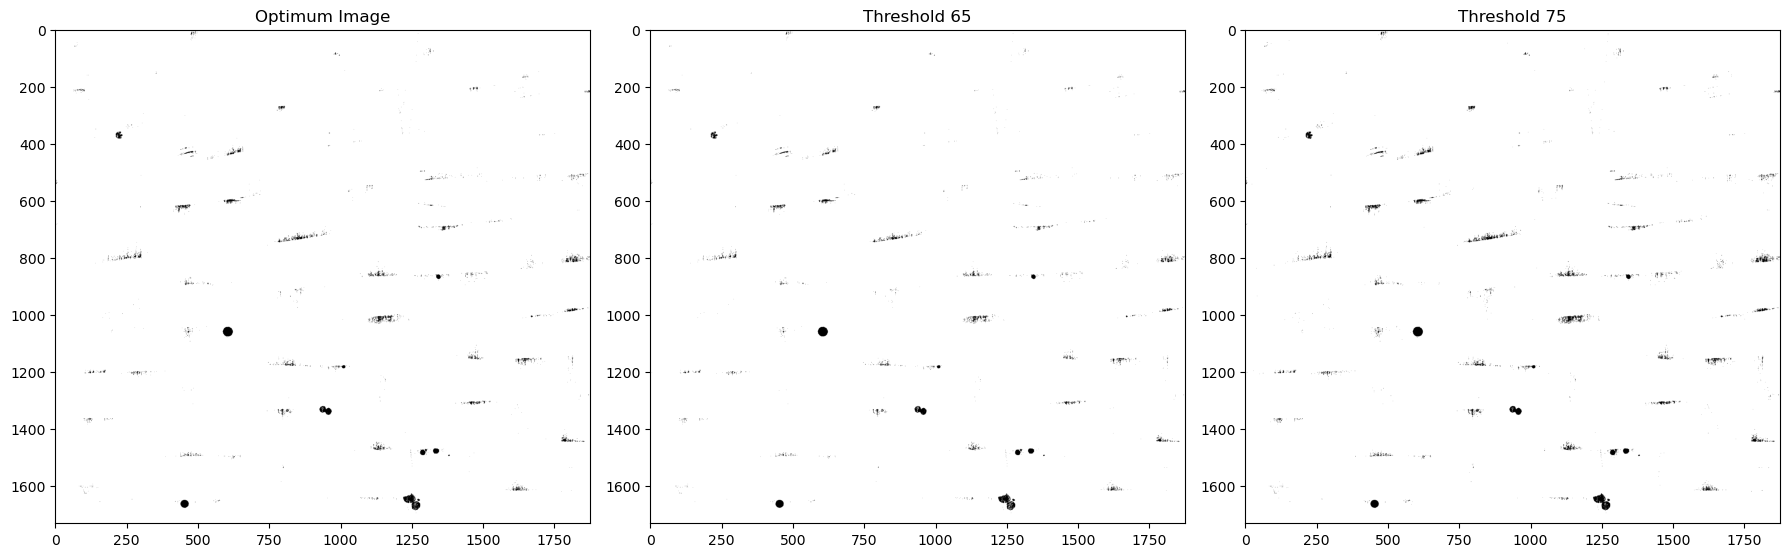

In [20]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(optimum, cmap='gray')
plt.title('Optimum Image')
plt.subplot(1, 3, 2)
plt.imshow(thresh65, cmap='gray')
plt.title('Threshold 65')
plt.subplot(1, 3, 3)
plt.imshow(thresh75, cmap='gray')
plt.title('Threshold 75')
plt.tight_layout()
plt.show()

In [21]:
#Void content
print(f"Void Content: {void_content:.2f}%")

Void Content: 0.48%


#### Comment:

The obtained percentage is acceptable. The obtained value of 0.48% is well under the acceptable limit of 1-2%. If we were to assume to similar pattern of voids in all the remaining slices that constitute the entire 3D laminate, realistically, the void overall content would be within the range.

#### Question 6.2: Now expand your previous code and apply the same technique to estimate the overall void volume content (in 3D) of the laminate. The folder provided with this notebook contains 107 slices obtained with microtomography. Using your algorithm from question 6.1 calculate the void content of each slice and report all the values in a single graph as a function of the slice number. Finally, calculate the average void content (in 3D) and comment on the difference/similarity with your answer in question 6.1. 
#### Please also comment on the applicability of 2D void content measurements to represent the overall void content of a product.

In [22]:
def process_folder(folder_path):
    void_contents = []
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]
    image_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        void_content, optimum, thresh65, thresh75 = calculate_void_content(image)
        void_contents.append(void_content)

    return void_contents

In [23]:
def plot_void_contents(void_contents):
    plt.figure(figsize=(10, 6))
    plt.plot(void_contents, linestyle='-', color='b')
    plt.title('Void Content Across Slices')
    plt.xlabel('Slice Number')
    plt.ylabel('Void Content (%)')
    plt.xlim(0, 106)
    plt.ylim(0, 1.2)
    plt.grid(True)
    plt.show()

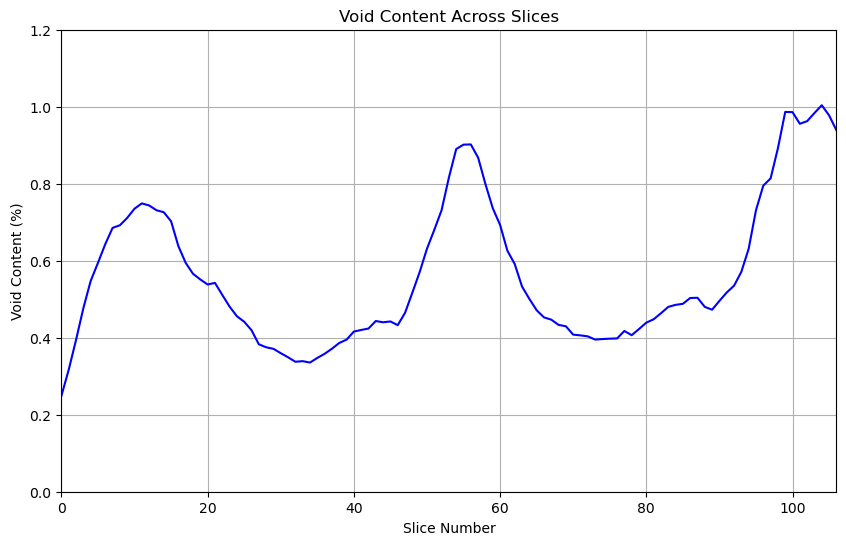

In [24]:
folder_path = os.path.join(os.getcwd(), "Slices")
void_contents = process_folder(folder_path)
plot_void_contents(void_contents)
average_void_content = np.mean(void_contents)

In [25]:
print(f"Average Void Content (3D): {average_void_content:.2f}%")

Average Void Content (3D): 0.56%


#### Comments:

The average obtained through the analysis of all slices and that obtained through slice_0130 have a difference of <0.1%. This minor difference can be attributed to the slightly higher void content in the later slices (slice no. 100 onwards), as seen in the above plot. However, despite this minor difference, it can be said that the analysis of slice_0130 gives a very good approximation of the average void content in the laminate as a whole. 

While 2D void content measurements provide valuable information about individual slices or layers, they may not be sufficiently accurate in representing the overall void volume content in a 3D structure. The main reason for this limitation is that 2D measurements only consider voids within a single plane and do not account for the distribution of voids in the third dimension.

In a 3D structure, voids may extend across multiple layers, and their arrangement in the third dimension can significantly impact the overall void content. The laminate may have extended voids in the z-direction, leading to a more complex void network than observed in individual 2D slices. As explained by [1], the size of spherical defects cannot be reflected accurately in 2D due to a "unfolding" error that occurs based on the position of the slicing plane in the laminate.

Reference:

[1] Song, Y., Shen, C., Damiani, R. M., & Lange, D. A. (2021). Image-based restoration of the concrete void system using 2D-to-3D unfolding technique. Construction and Building Materials, 270, 121476.

#### Question 6.3: What are the primary characterization techniques employed for void content evaluation? List three techniques. Could you outline the advantages and disadvantages of each technique? Additionally, which of these techniques, and any others covered in lectures, can be applied proactively (ex ante) to prevent void formation?

1) Microscopy: Microscopy techniques allow for the characterization of voids in terms of size, shape, and distribution. Optical or electron microscopy techniques are used to determine the spatial distribution of voids visually. With the help of image analysis, a quantitative analysis of void content can be obtained. However, these measurements are very section-based, i.e. limited to the 2D section chosen for analysis. Void characterization in a specific 2D section may not be the same for another. This makes it a more qualitative technique. 

2) Ultrasonic testing: A key advantage of US testing is that it is non-destructive. High frequency sound waves are used to determine the presence of defects within a composite structure. Even small imperfections can be identified reliably using this technique. However, defects can only be detected if they are oriented perpendicular to the direction in which the sound waves propagate. Analyzing ultrasonic signals and measurements also are very tricky especially when it comes to determining void content in a composite. 

3) X-ray micro-CT: X-ray creates a volumetric image by reconstructing several cross-sectional radiographic images on a micrometer scale. Their high frequency is benefitial in identifing void distribution across a sample. However, voids with a small cross-sectional area could be missed by such characterization technique. Like ultrasonic testing, it is also non-destructive. 

Optical microscopy allows for observation of void formation in the composite as it is being processed. Since a precise quanitative analysis is not required and image analysis software is relatively quick, it can be used proactively prevent void formation. Ultrasonic testing can also be done in-situ for the same purposes.

#### Question 6.4: Image analysis on the image provided above (Figure 8, question 6.1) can also be useful to obtain an estimation of fibre volume fraction and matrix content.
#### To do this, first obtain and display the histogram of the woven fabric laminate, manipulate the initial image to obtain a better thresholding and describe what you did in terms of manipulation of the image, display the newly obtained histogram and then use this data to quantify the fibre and matrix content for the image provided.
#### Finally, comment on the fibre volume content you obtained.

In [26]:
def display_histogram(image, title):
    image_uint8 = image.astype(np.uint8)
    hist = cv2.calcHist([image_uint8.flatten()], [0], None, [256], [0, 256])
    plt.figure(figsize=(10, 6))
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

In [27]:
def adjust_pixels1(pixel):
    if pixel < 155:
        return pixel - (pixel/2)
    else:
        return pixel + ((255-pixel)/2)
    
def adjust_pixels2(pixel):
    if pixel < 160:
        return pixel - (pixel/2)
    else:
        return pixel + ((255-pixel)/2)
    
def adjust_pixels3(pixel):
    if pixel < 150:
        return pixel - (pixel/2)
    else:
        return pixel + ((255-pixel)/2)

In [28]:
def manipulate_slice0130(image):
    adjusted_image1 = np.vectorize(adjust_pixels1)(image)
    adjusted_image2 = np.vectorize(adjust_pixels2)(image)
    adjusted_image3 = np.vectorize(adjust_pixels3)(image)
    return adjusted_image1, adjusted_image2, adjusted_image3

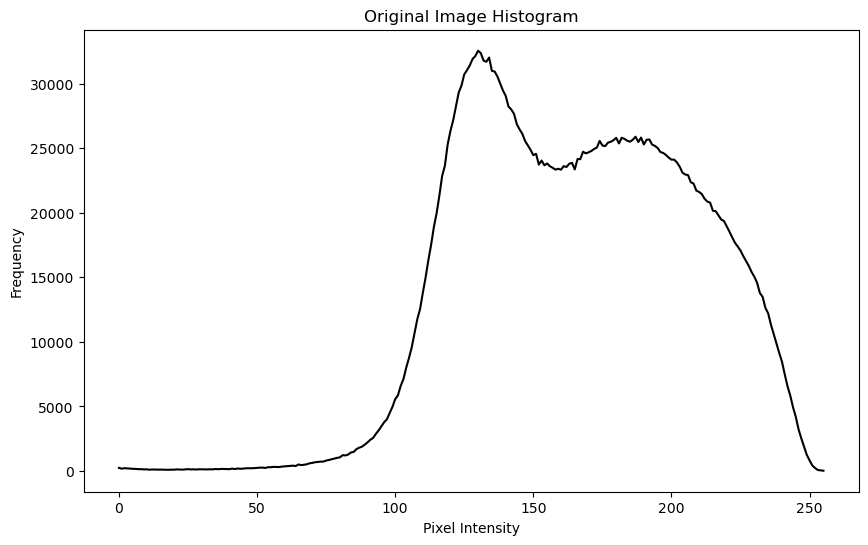

In [29]:
#Read image
image_path = 'slice_0130.jpeg' 
slice0130 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
display_histogram(slice0130, 'Original Image Histogram')
optimum_image, thresh160, thresh150 = manipulate_slice0130(slice0130)

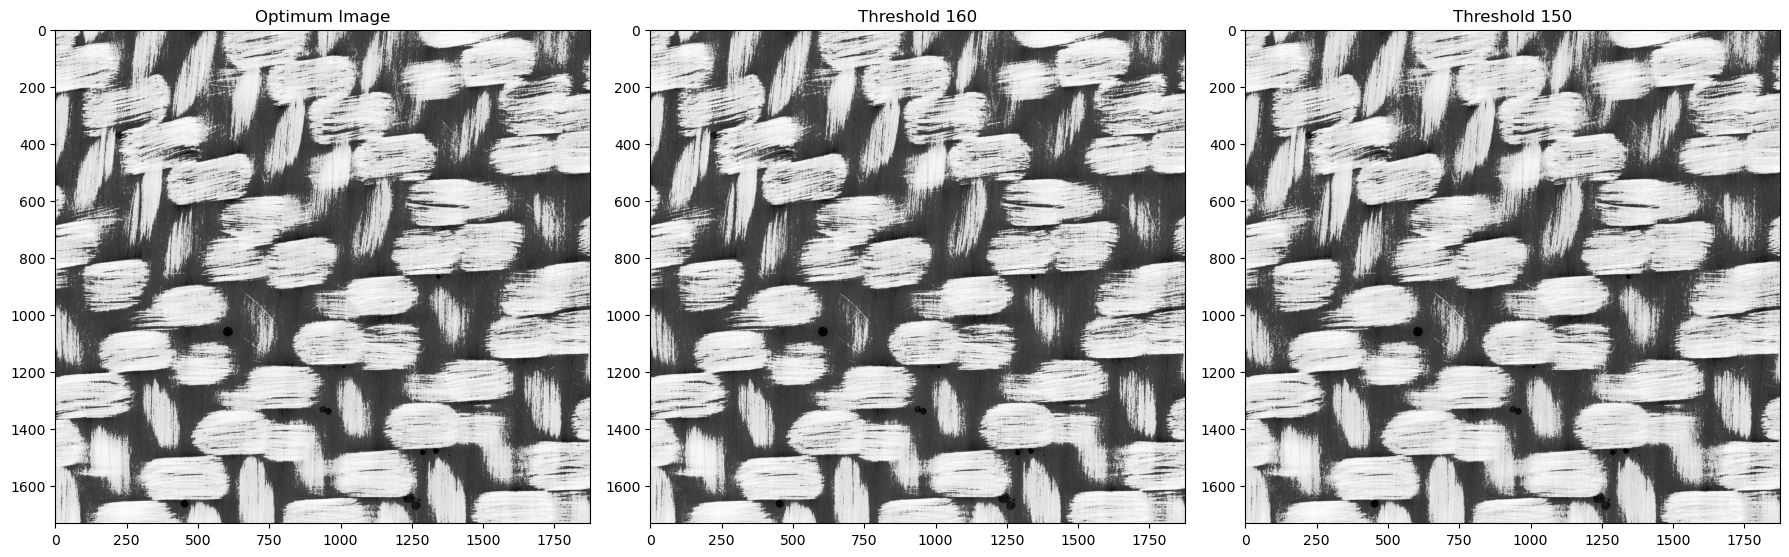

In [30]:
#Show manipulated slice
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(optimum_image, cmap='gray')
plt.title('Optimum Image')
plt.subplot(1, 3, 2)
plt.imshow(thresh160, cmap='gray')
plt.title('Threshold 160')
plt.subplot(1, 3, 3)
plt.imshow(thresh150, cmap='gray')
plt.title('Threshold 150')
plt.tight_layout()
plt.show()

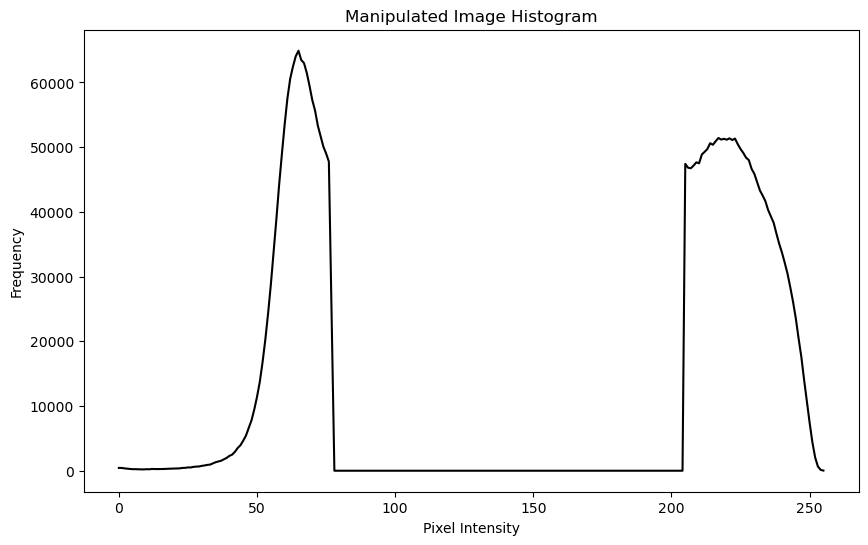

In [31]:
display_histogram(optimum_image, 'Manipulated Image Histogram')

In [32]:
def fmcontent(optimum_image):
    fibrecont = np.count_nonzero(optimum_image >= 155)
    matrixcont = np.count_nonzero(optimum_image < 155)
    total_pixel = fibrecont + matrixcont
    fibrecontper = (fibrecont / total_pixel) * 100
    matrixcontper = (matrixcont / total_pixel) * 100
    return fibrecontper, matrixcontper

In [33]:
#Compute fibre volume content
fiber_content, matrix_content = fmcontent(optimum_image)
print(f"Fiber Volume Content: {fiber_content:.2f}%")
print(f"Matrix Volume Content: {matrix_content:.2f}%")

Fiber Volume Content: 58.34%
Matrix Volume Content: 41.66%


#### Manipulation:

Upon close analysis of the histogram obtained from the original image, we can see a local minimum occurring at about 155 intensity. Therefore, we chose 155 as a mid-way threshold between fibres and matrix to manipulate the original image. We have modified the image's contrast by increasing or decreasing the contrast of the pixels above and below 155, respectively, to confirm our threshold estimate optically. It was found that increasing the threshold compromised the contrast for the darker fibre portions of the original image (primarily the vertical direction fibres in the middle of the image), whereas decreasing the threshold did the same for the lighter shades of the matrix (noticeably in the top-right corner).

#### Comment:

The obtained value of fibre volume content of 58.34% is slightly lower than the optimum value of 60%. This can be attributed to many factors, such as manufacturing inaccuracies or voids. However, in the given case, the thresholding to segregate the fibres from the matrix in the image analysis should be considered an essential factor in the value of fibre volume content obtained. Additionally, we must remember that a 2D slice only gives us an idea of the overall fibre volume content and does not consider the changes in the z-direction.

## Question 7 (4 points)

#### As it was mentioned at the beginning of the 'Voids' section, defects in composites have implications on the mechanical performance of the composite structure. In the next question, you will analyze two Force-Strain datasets for two similar samples. The samples are joined through continuous ultrasonic welding. Their cross-sectional micrographs are displayed below, and can be seen in Figure 9 and 10 respectively.
<img src="SLS_yes.jpg" width="400" height="240"> 

Figure 9

<img src="SLS_no.jpg" width="400" height="240">

Figure 10
#### Question 7.1: Examine Figure 9 and 10. One of these images shows a consolidated sample, the other one shows a defective sample. Please explain which figure belongs to which sample. Also provide a small discussion on the expected differences, and why these differences would occur.

Figure 9 is the consolidated sample while figure 10 shows the defective sample. This can be identified since black dots can be observed at the weld line of the two plates in figure 10. These black dots are voids, small areas where there is no resin. It is clear that voids have negative implications on the mechanical performance of the composite structure, which makes the sample from figure 10 a defective one. 

The presence of voids at the weld line will reduce the maximum applicable shear force on this welded joint. Due to these voids, there is less available material to transfer load across the two plates. This would increase the stress that the surrounding material must carry when the component is loaded. When thermoplastic composites are welded and consolidated, they are ideally required to perform as one component. The presence of these voids inhibit this consolidation by distinguishing between the two parts.

#### Question 7.2: Attached are two datasets of Single Lap Shear tests, both with identical test settings. Each dataset contains the results of 5 samples. One of the datasets is derived from a reasonably well consolidated sample, while the other dataset coming from a defective sample. Plot and analyze the Stress-Strain graphs. Conclude which of the sets is of the defective sample, and explain the difference in plotted curves.

In [34]:
def read_normal(file_path):
    data = pd.read_excel(file_path)
    strain_columns = [f's{i}' for i in range(1, 6)]
    force_columns = [f'f{i}' for i in range(1, 6)]
    j = 0
    k = 1
    for i in range(5):
        strain_column = data.iloc[:, j]
        force_column = data.iloc[:, k]
        data[strain_columns[i]] = strain_column / 100
        data[force_columns[i]] = force_column / 322.58
        j = j+2
        k = k+2
    return data[strain_columns], data[force_columns]

In [35]:
def plot_data(samples, title, save_path):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue']
    for i, sample in enumerate(samples):
        for j in range(5):
            label = f'Sample {i + 1}.{j + 1}'
            plt.plot(sample[0].iloc[:, j], sample[1].iloc[:, j], label=label, linewidth=1, color=colors[i])
    plt.legend()
    plt.ylabel('Stress [$N/mm^2$]')
    plt.xlabel('Strain')
    plt.xlim([0, 0.016])
    plt.ylim([0, 40])
    plt.title(title)
    plt.grid()
    plt.show()

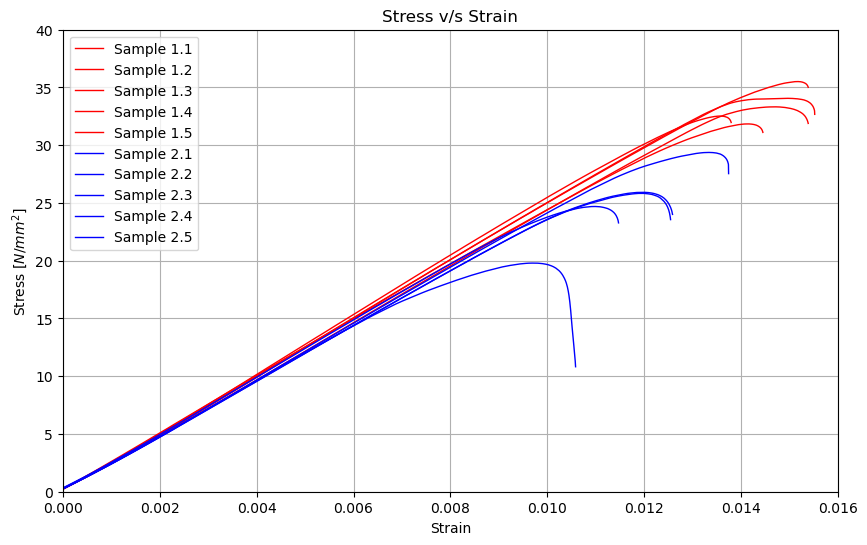

In [36]:
s_1, f_1 = read_normal('Weld1Cons.xlsx')
s_2, f_2 = read_normal('Weld2Cons.xlsx')
samples = [(s_1, f_1), (s_2, f_2)]
plot_data(samples, 'Stress v/s Strain', 'Q72.png')

In [37]:
def calculate_slope(x_values, y_values, cut):
    slope, _ = np.polyfit(x_values[6:cut], y_values[6:cut], 1)
    return slope

In [38]:
for i in range(5):
    slope_1 = calculate_slope(s_1[f's{i+1}'], f_1[f'f{i+1}'], 35)
    print(f'Elastic Modulus for Sample 1.{i+1}: {round((slope_1),2)} MPa')

Elastic Modulus for Sample 1.1: 2259.66 MPa
Elastic Modulus for Sample 1.2: 2177.79 MPa
Elastic Modulus for Sample 1.3: 2147.19 MPa
Elastic Modulus for Sample 1.4: 2121.73 MPa
Elastic Modulus for Sample 1.5: 2212.08 MPa


In [39]:
for i in range(5):
    slope_2 = calculate_slope(s_2[f's{i+1}'], f_2[f'f{i+1}'], 35)
    print(f'Elastic Modulus for Sample 2.{i+1}: {round((slope_2),2)} MPa')

Elastic Modulus for Sample 2.1: 1993.43 MPa
Elastic Modulus for Sample 2.2: 2127.09 MPa
Elastic Modulus for Sample 2.3: 2002.78 MPa
Elastic Modulus for Sample 2.4: 1969.21 MPa
Elastic Modulus for Sample 2.5: 2072.36 MPa


#### Comments:

The sample set 2 belongs to the defective set. A trend is observed where the curves for specimens from set 2 are seen to have a lower maximum stress and lower strain at failure than those from set 1. This indicates an improper consolidation cycle, which has weakened the specimens from set 2.

#### Question 7.3: From your results of Q7.2, you should be able to derive that the elastic moduli are approximately similar for all samples. Explain why this is the case.

Composite materials are linear-elastic until failure. Since the composite remains the same across all samples with and without voids, the elastic moduli remain relatively unchanged. Increasing void content would however, change the point at which failure occurs for the shear loaded samples.